In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def position(t, g, v0, phi, x0, y0):
    # Take a time 1-D array
    y = y0 + v0*np.sin(phi)*t + 0.5*g*t**2
    x = x0 + v0*np.cos(phi)*t
    actual_x = []
    actual_y = []
    final_x = x0
    set_final = False
    for xi, yi in zip(x,y):
        if yi < 0 and not set_final:
            set_final = True
            final_x = xi
        if set_final:
            actual_x.append(final_x)
            actual_y.append(0.0)
        else:
            actual_x.append(xi)
            actual_y.append(yi)
    actual_x = np.array(actual_x)
    actual_y = np.array(actual_y)
    return actual_x, actual_y

In [30]:
# Define gravitational acceleration on Mars
g = -3.736 # m/s^2

In [31]:
# Initial position and velocity
x0 = 0.0
y0 = 0.0
phi = 45.0*np.pi/180.0
v0 = 54.0 # m/s, approx max speed for baseball

In [32]:
# Time vector
t = np.linspace(0, 30, num=1000)

In [33]:
pos_x, pos_y = position(t, g, v0, phi, x0, y0)

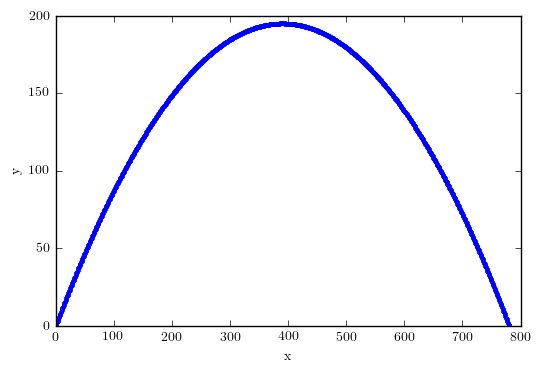

In [35]:
# Plot the trajectory
plt.plot(pos_x, pos_y, marker='.', linestyle='none')
plt.xlabel('x')
plt.ylabel('y')

In [36]:
f = open('mars_baseball_trajectory.txt', 'w')
f.write('#          x                    y\n')
for xi, yi in zip(pos_x, pos_y):
    f.write('{}     {}\n'.format(xi, yi))
f.close()